In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#from sklearn.datasets import load_boston

In [2]:
df = pd.read_csv('final_df.csv')

In [7]:
df.head(5)

,Unnamed: 0,km_driven,selling_price,Age,Luxury_Segment,Fuel_Used_Gas,Fuel_Used_Petrol,Ownership_2nd Owner,Ownership_3rd Owner,Ownership_4th Owner,Transimission_Type_Manual
0,0,46245,432499,7,0,0,0,0,0,0,1
1,1,95779,383499,10,0,0,1,0,0,0,1
2,2,12761,371599,10,0,0,1,0,1,0,1
3,3,41575,323699,4,0,0,1,0,0,0,1
4,4,89851,392899,7,0,0,0,0,0,0,1


In [8]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [9]:
df.head(5)

,km_driven,selling_price,Age,Luxury_Segment,Fuel_Used_Gas,Fuel_Used_Petrol,Ownership_2nd Owner,Ownership_3rd Owner,Ownership_4th Owner,Transimission_Type_Manual
0,46245,432499,7,0,0,0,0,0,0,1
1,95779,383499,10,0,0,1,0,0,0,1
2,12761,371599,10,0,0,1,0,1,0,1
3,41575,323699,4,0,0,1,0,0,0,1
4,89851,392899,7,0,0,0,0,0,0,1


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X=df.iloc[:,[0,2,3,4,5,6,7,8,9]]
y=df.iloc[:,1]

In [6]:
y

0       46245
1       95779
2       12761
3       41575
4       89851
        ...  
4763    30051
4764    31787
4765    12651
4766    42126
4767    27160
Name: km_driven, Length: 4768, dtype: int64

In [11]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [13]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [15]:
regression.score(x_train,y_train)

0.5852914552804951

In [16]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
    return adjusted_r2

In [17]:
adj_r2(x_train,y_train)

0.5842447988299972

#### Using KNN regressor

In [18]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 242577.34916348066
RMSE value for k=  2 is: 226000.37733086038
RMSE value for k=  3 is: 219934.59584706117
RMSE value for k=  4 is: 213334.98084716927
RMSE value for k=  5 is: 212080.1192154582
RMSE value for k=  6 is: 211661.51324613532
RMSE value for k=  7 is: 212322.12974119926
RMSE value for k=  8 is: 212556.10805698144
RMSE value for k=  9 is: 212029.494499761
RMSE value for k=  10 is: 211822.11758431338
RMSE value for k=  11 is: 212315.26743859678
RMSE value for k=  12 is: 210805.41133822442
RMSE value for k=  13 is: 209265.7758426861
RMSE value for k=  14 is: 207965.7637038567
RMSE value for k=  15 is: 207815.99797287048
RMSE value for k=  16 is: 206927.13550592665
RMSE value for k=  17 is: 207057.20886935826
RMSE value for k=  18 is: 206967.62549426485
RMSE value for k=  19 is: 206455.8607391338
RMSE value for k=  20 is: 206719.59102161424


<AxesSubplot:>

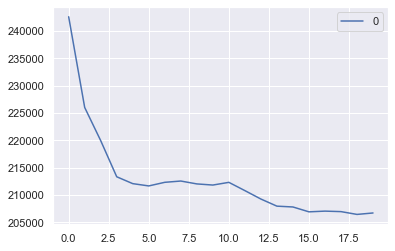

In [21]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [22]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [24]:
predict = model.predict(x_test)

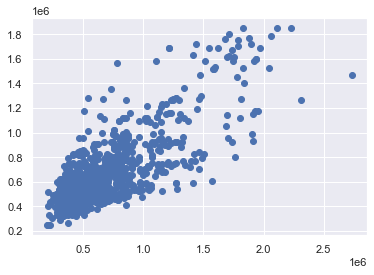

In [26]:
plt.scatter(y_test,predict)